<h1>선형 모델</h1>

In [ ]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 선형 회귀 모델

당뇨병 데이터 셋

In [ ]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True,as_frame=True)

In [ ]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
y[:5]

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [ ]:
# 훈련 데이터와 평가 데이터를 임의로 분할
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
print( xtrain.shape, xtest.shape )

(265, 10) (177, 10)


단순 회귀 분석

In [ ]:
# 변수 중에서 bmi 만 추출
xtrain_simple = xtrain[['bmi']]
xtest_simple = xtest[['bmi']]

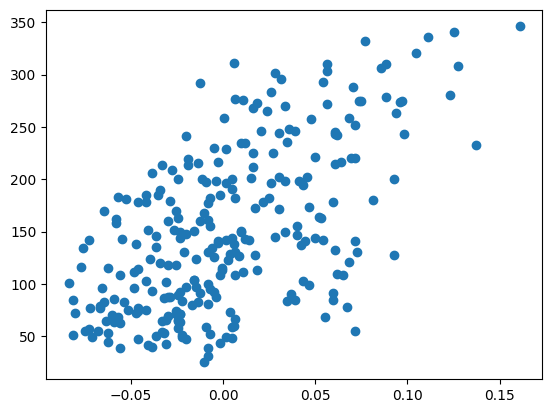

In [ ]:
# 훈련데이터에서 x와 y의 관계
plt.scatter(xtrain_simple,ytrain)

In [ ]:
# 선형 회귀 모델 선언
from sklearn.linear_model import LinearRegression
f = LinearRegression()

In [ ]:
f.fit(xtrain_simple,ytrain)  # 모델 훈련

LinearRegression()

In [ ]:
print( f.intercept_, f.coef_ )  # 파라메터 확인

148.53674347978227 [980.74210468]


In [ ]:
f.predict([[0.01]])  # 그 값에 대한 예측

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([158.34416453])

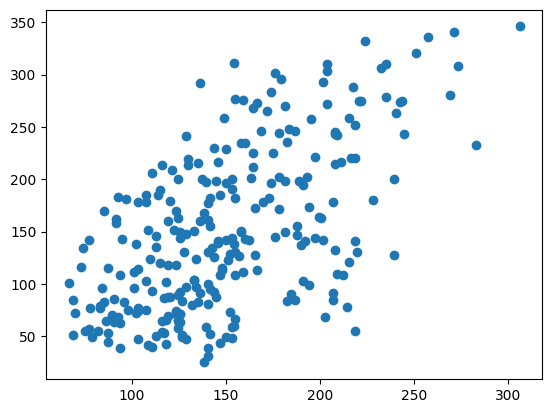

In [ ]:
# 모든 훈련데이터에 대해서 예측
ytrain_hat = f.predict(xtrain_simple)
plt.scatter(ytrain_hat,ytrain)  # 예측값과 실제값 사이의 산점도

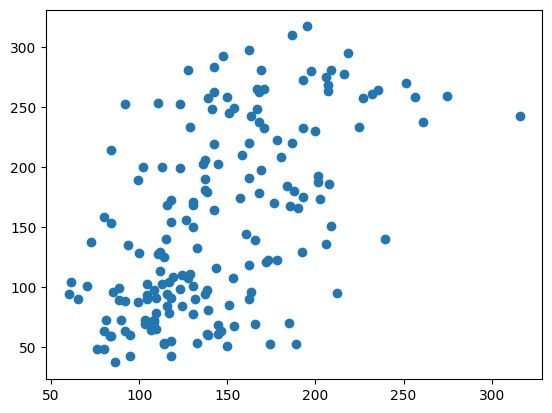

In [ ]:
# 모든 평가 데이터에 대해서 예측
ytest_hat = f.predict(xtest_simple)
plt.scatter(ytest_hat,ytest)

In [ ]:
f.score(xtrain_simple,ytrain)   # 훈련 데이터에 대한 R2

0.3686078890927438

In [ ]:
f.score(xtest_simple,ytest)     # 평가 데이터에 대한 R2

0.2991646176262257

일반 회귀 분석

In [ ]:
from sklearn.linear_model import LinearRegression
f = LinearRegression()

In [ ]:
f.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
print( f.intercept_, f.coef_ )

148.9285083717007 [  18.08799763 -227.04344876  592.27723487  361.54123241 -655.90738774
  353.71636413   14.41265469  142.87369371  594.01542882   31.67317969]


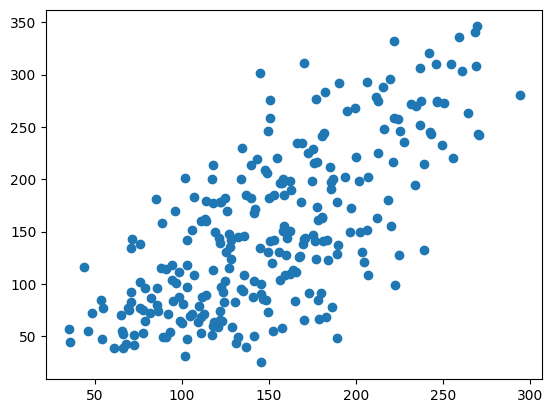

In [ ]:
# 모든 훈련데이터에 대해서 예측
ytrain_hat = f.predict(xtrain)
plt.scatter(ytrain_hat,ytrain)  # 예측값과 실제값 사이의 산점도

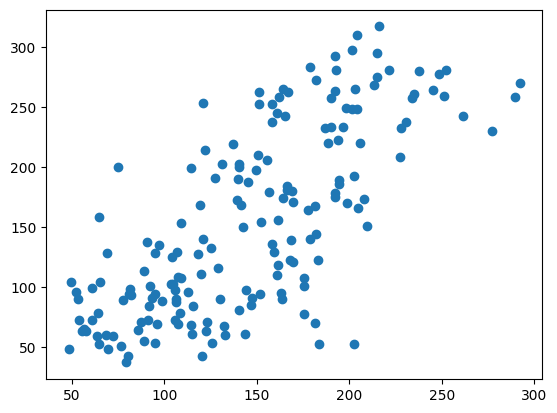

In [ ]:
# 모든 평가 데이터에 대해서 예측
ytest_hat = f.predict(xtest)
plt.scatter(ytest_hat,ytest)

In [ ]:
# R2 평가
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.5072191031715794 0.515743631390243


# 로지스틱 회귀 모델

아이리스 데이터 셋

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True,as_frame=True)
X.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
X = X[50:]
y = y[50:]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
xtrain.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
99,5.7,2.8,4.1,1.3
84,5.4,3.0,4.5,1.5
57,4.9,2.4,3.3,1.0
145,6.7,3.0,5.2,2.3
77,6.7,3.0,5.0,1.7


In [ ]:
print(xtrain.iloc[0:2].values)

[[5.7 2.8 4.1 1.3]
 [5.4 3.  4.5 1.5]]


In [ ]:
ytrain[:5]

,target
99,1
84,1
57,1
145,2
77,1


In [ ]:
print( xtrain.shape, xtest.shape )

(60, 4) (40, 4)


단순 로지스틱 회귀

In [ ]:
# 변수 중에서 SepalLength 만 추출
xtrain_simple = xtrain[['SepalLength']]
xtest_simple = xtest[['SepalLength']]

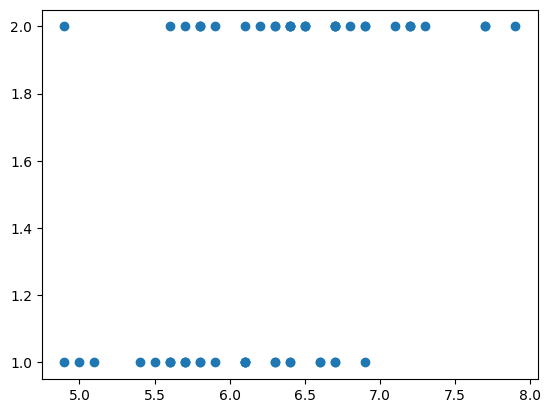

In [ ]:
# SepalLength와 target (Species)와의 관계
plt.scatter(xtrain_simple,ytrain)

In [ ]:
# 로지스틱 회귀 모델 로딩
from sklearn.linear_model import LogisticRegression
f = LogisticRegression()

In [ ]:
# 모델 훈련
f.fit(xtrain_simple,ytrain)

LogisticRegression()

In [ ]:
# 파라메터 확인
print( f.intercept_, f.coef_ )

[-8.20157357] [[1.3444015]]


In [ ]:
# 하나의 값에 대한 예측
f.predict([[5.5]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
# 확률 예측
f.predict_proba([[5.5]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.69154779, 0.30845221]])

In [ ]:
# 훈련데이터 전체에 대한 예측
ytrain_hat = f.predict(xtrain_simple)

In [ ]:
# 혼동 행렬
pd.crosstab(ytrain_hat,ytrain)

target,1,2
row_0,,
1,18,8
2,9,25


In [ ]:
# 평가데이터에 대한 예측과 혼동행렬
ytest_hat = f.predict(xtest_simple)
pd.crosstab(ytest_hat,ytest)

target,1,2
row_0,,
1,16,3
2,7,14


In [ ]:
# 정확도(Accuracy) 성능 평가
print( f.score(xtrain_simple,ytrain) )
print( f.score(xtest_simple,ytest) )

0.7166666666666667
0.75


일반 로지스틱 회귀 모델

In [ ]:
from sklearn.linear_model import LogisticRegression
f = LogisticRegression()
f.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
print( f.intercept_, f.coef_ )

[-12.04420033] [[-0.37059849 -0.45300253  2.539944    1.96188842]]


In [ ]:
ytrain_hat = f.predict(xtrain)
ytest_hat = f.predict(xtest)

In [ ]:
pd.crosstab(ytrain_hat,ytrain)

target,1,2
row_0,,
1,25,1
2,2,32


In [ ]:
pd.crosstab(ytest_hat,ytest)

target,1,2
row_0,,
1,22,0
2,1,17


In [ ]:
# 정확도(Accuracy) 성능 평가
print( f.score(xtrain,ytrain) )
print( f.score(xtest,ytest) )

0.95
0.975


# 연습 문제

1. 아이리스 데이터 셋에서 Sepal Width를 다른 수치형 값인 Sepal Length, Petal Length, Petal Width로 선형회귀 예측하고자 한다. 150개의 표본을 모두 사용하여 모델을 훈련한다고 하자. 이때, 훈련 데이터에서 R2의 값은 얼마인가?

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True,as_frame=True)

In [ ]:
X.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
X, y = X[['SepalLength','PetalLength','PetalWidth']], X['SepalWidth']

In [ ]:
# 선형 회귀 모델 선언
from sklearn.linear_model import LinearRegression
f = LinearRegression()

f.fit(X, y)

print(round(f.score(X, y), 2))

# R2 : 0.52

0.52


2. 당뇨 데이터의 Y 값의 평균을 중심으로 Neg와 Pos 로 나누어 이진 분류를 하고자 한다. 아래의 코드를 참조하시오. 로지스틱 회귀 모델을 사용하여 Y를 분류하는 모델을 만드시오. 모델은 X의 sex, age 변수만을 입력으로 사용하며, 훈련 데이터로만 학습을 수행한다. 이때, 평가 데이터에 대한 Recall값은 얼마인가? Pos를 positive로 생각한다.

In [1]:
from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True,as_frame=True)
y = [ 'Neg' if y_numeric[i]<140 else 'Pos' for i in range(len(y_numeric)) ]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

In [2]:
xtrain = xtrain[['sex', 'age']]
xtest = xtest[['sex', 'age']]

In [3]:
# 선형 회귀 모델 선언
import pandas as pd
from sklearn.linear_model import LogisticRegression
f = LogisticRegression()
f.fit(xtrain, ytrain)
print(f.score(xtest, ytest))

ytest_hat = f.predict(xtest)
pd.crosstab(ytest,ytest_hat)

0.519774011299435


col_0,Neg,Pos
row_0,,
Neg,18,71
Pos,14,74


In [4]:
table = pd.crosstab(ytest,ytest_hat).values
print(table)

Recall = table[1,1]/(table[1,1]+table[1,0])
Precision = table[1,1]/(table[1,1]+table[0,1])
F1score = 2*Precision*Recall/(Precision+Recall)
print(Recall, Precision, F1score)

[[18 71]
 [14 74]]
0.8409090909090909 0.5103448275862069 0.6351931330472104


In [5]:
# F1score
print(f'{Recall:.2f}')

0.84
